In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

In [3]:
print(357 / (357+212)) # 0
print(212 / (357+212)) # 1

0.6274165202108963
0.37258347978910367


In [4]:
from sklearn.model_selection import train_test_split

X = df[df.columns[2:]]
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [6]:
X_train_ = np.array(X_train, dtype=np.float64)
y_train_ = np.array(y_train)
row, col = X_train_.shape

In [7]:
from src.nn.model import Sequential
from src.nn.layer import Dense
from src.nn.activation import RelU, Sigmoid
from src.nn.optimizer import SGD

np.random.seed(42)

model = Sequential()
model.add(Dense(128, activation=RelU, input_dim=col))
model.add(Dense(128, activation=RelU))
model.add(Dense(128, activation=RelU))
model.add(Dense(1, activation=Sigmoid))

epochs = 10000
lr = 1e-4

model.compile(optimizer=SGD(learning_rate=lr))
losses = model.fit(X_train_, y_train_, 
                batch_size=1, epochs=epochs, 
                verbose=0, history=True, save_best=True)

Epoch (10000/10000), loss = 77.45453215550864
Best loss: 26.267372561029475


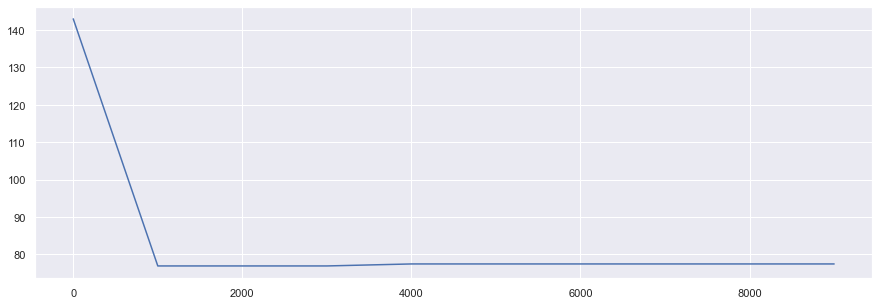

<Figure size 1080x360 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["figure.figsize"] = [15,5]

every = 1000
x = [i + 1 for i in range(0, epochs, every)]
y = [losses[i] for i in x]

plt.plot(x, y)
plt.figure()
plt.show()

In [9]:
from src.nn.metrics import Accuracy

ypred = np.array(model.predict(np.array(X_train)) > 0.5, dtype=np.int32)
Accuracy.calculate(ypred, np.array(y_train_))

0.8725274725274725

In [10]:
ypred = np.array(model.predict(np.array(X_test)) > 0.5, dtype=np.int32)
Accuracy.calculate(ypred, np.array(y_test))

0.37719298245614036

In [11]:
model.evaluate(np.array(X_test), np.array(y_test))

----- Summary -----
- mean_squared_error = 20.527939906055604
-------------------
